#Import

In [ ]:
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasetprojpowerbi.csv')

#Data Check

In [ ]:
df

,Genre,Reports,Age,Gpa,Year,Count,Gender,Nationality
0,Academic Support and Resources,The limited access to research databases and m...,27,2.18,2,1,M,Egypt
1,Academic Support and Resources,I'm having trouble finding the course material...,23,3.11,2,1,F,Egypt
2,Academic Support and Resources,It's frustrating to have limited access to res...,20,3.68,2,1,F,Egypt
3,Academic Support and Resources,I'm really struggling in one of my classes but...,20,1.30,2,1,F,Egypt
4,Academic Support and Resources,I am really struggling with understanding the...,26,2.50,2,1,F,Egypt
...,...,...,...,...,...,...,...,...
1000,Food and Cantines,26. I have been unable to find food that meets...,18,1.16,4,1,M,Indonesia
1001,Food and Cantines,27. I have been unable to find food that I can...,20,4.05,2,1,M,Indonesia
1002,Food and Cantines,28. I have been unable to find food that I enjoy.,22,1.86,3,1,M,Indonesia
1003,Food and Cantines,29. I have been unable to find food that is he...,20,2.06,2,1,M,Indonesia


In [ ]:
unique_genres = df['Genre'].unique()
print(unique_genres)

['Academic Support and Resources' 'Athletics and sports'
 'Career opportunities' 'Financial Support'
 'Health and Well-being Support' 'International student experiences'
 'Online learning' 'Student Affairs' 'Housing and Transportation'
 'Activities and Travelling' 'Food and Cantines']


#Data Cleaning

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Genre        1005 non-null   object 
 1   Reports      1005 non-null   object 
 2   Age          1005 non-null   int64  
 3   Gpa          1005 non-null   float64
 4   Year         1005 non-null   int64  
 5   Count        1005 non-null   int64  
 6   Gender       1005 non-null   object 
 7   Nationality  1005 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 62.9+ KB


#EDA

In [ ]:
# Basic information
print("Basic Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe(include='all'))

# Missing values check
print("\nMissing Values Count:")
print(df.isnull().sum())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Genre        1005 non-null   object 
 1   Reports      1005 non-null   object 
 2   Age          1005 non-null   int64  
 3   Gpa          1005 non-null   float64
 4   Year         1005 non-null   int64  
 5   Count        1005 non-null   int64  
 6   Gender       1005 non-null   object 
 7   Nationality  1005 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 62.9+ KB
None

Statistical Summary:
                                 Genre  \
count                             1005   
unique                              11   
top     Academic Support and Resources   
freq                               236   
mean                               NaN   
std                                NaN   
min                                NaN   
25%                                N

In [ ]:
# Unique values in each column
for col in df.columns:
    print(f"\nUnique values and counts for {col}:\n", df[col].value_counts())


Unique values and counts for Genre:
 Genre
Academic Support and Resources       236
Food and Cantines                    138
Financial Support                     91
Online learning                       90
Career opportunities                  89
International student experiences     86
Athletics and sports                  85
Housing and Transportation            64
Health and Well-being Support         53
Activities and Travelling             40
Student Affairs                       33
Name: count, dtype: int64

Unique values and counts for Reports:
 Reports
The limited access to research databases and materials is causing a lot of frustration among students. We need better access to be able to succeed academically.    2
The academic workload is causing significant stress and anxiety, and I am finding it hard to cope with the pressure.                                                2
There seems to be a scarcity of available internships and job openings in my field of study.       

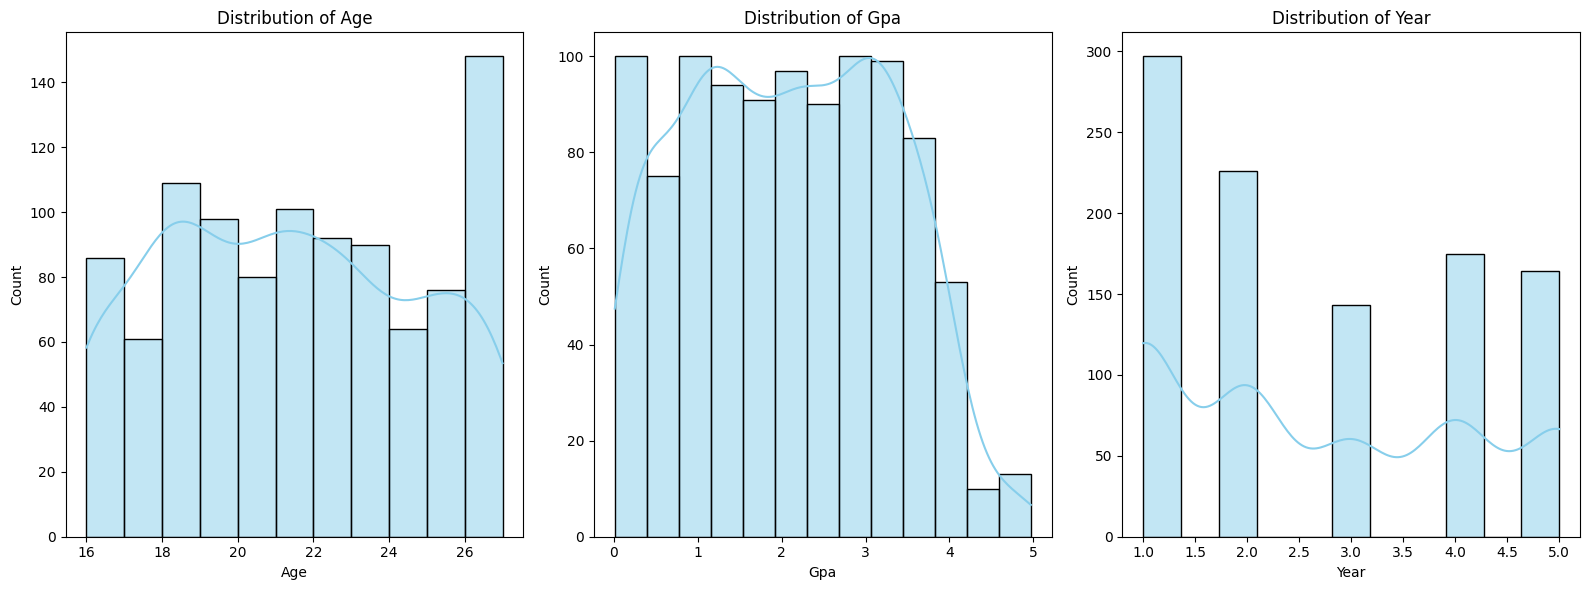

In [ ]:
# Distribution of numerical data
plt.figure(figsize=(16, 6))
for i, col in enumerate(['Age', 'Gpa', 'Year',], 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, color="skyblue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


<ipython-input-12-02cd0180b73d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, palette="viridis", order=df[col].value_counts().index)
<ipython-input-12-02cd0180b73d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis", order=df[col].value_counts().index)
<ipython-input-12-02cd0180b73d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis", order=df[col].value_counts().index)


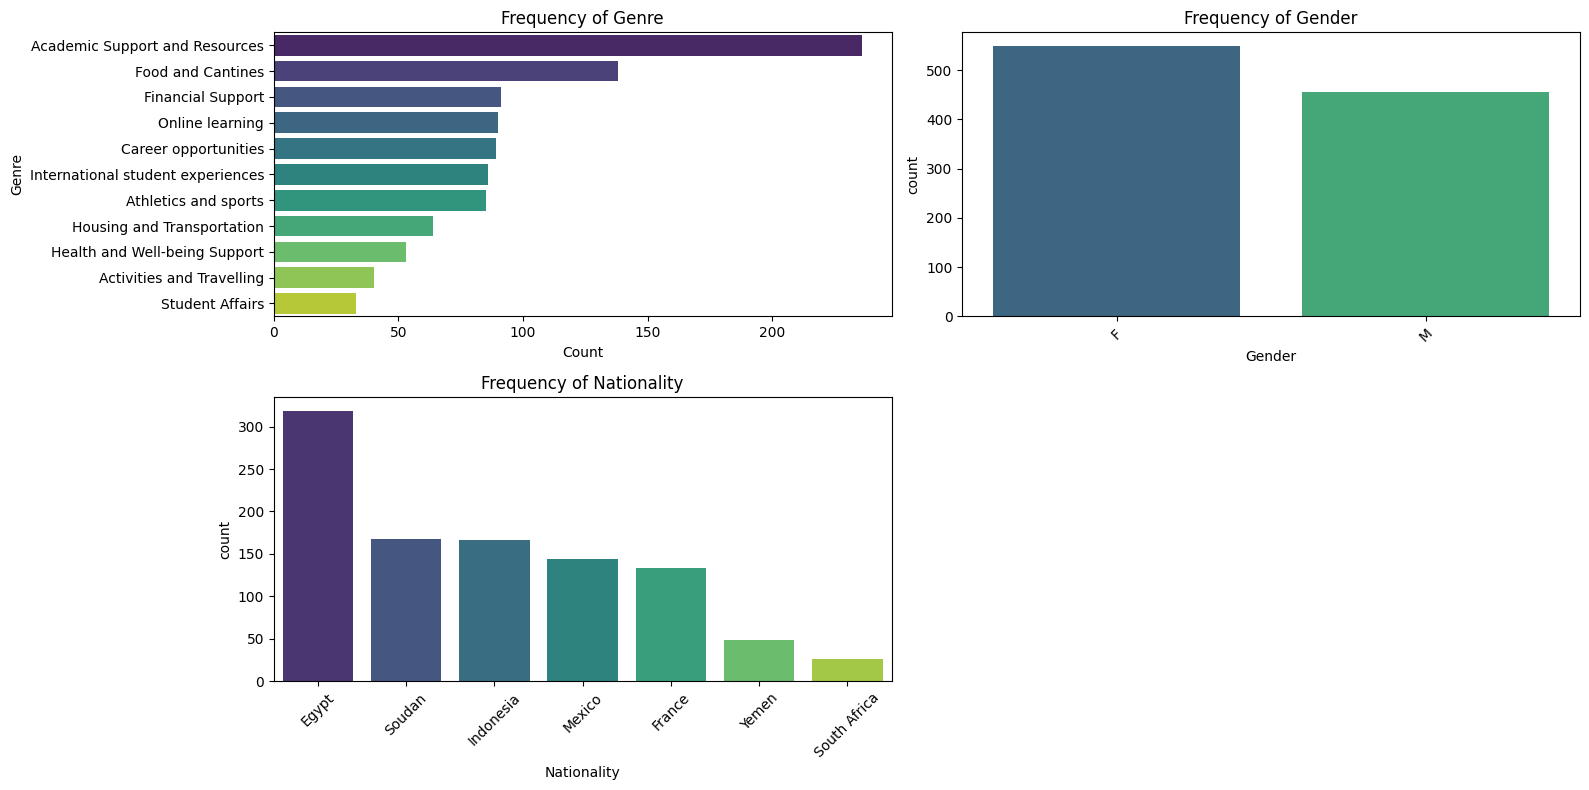

In [ ]:
# Visualization of categorical data with adjusted labels for 'Genre' and 'Reports'
plt.figure(figsize=(16, 8))
for i, col in enumerate(['Genre', 'Gender', 'Nationality'], 1):
    plt.subplot(2, 2, i)

    if col in ['Genre']:
        # Plot with rotated labels for longer text
        sns.countplot(y=col, data=df, palette="viridis", order=df[col].value_counts().index)
        plt.title(f"Frequency of {col}")
        plt.ylabel(col)  # Y-axis label for horizontal bars
        plt.xlabel("Count")
    else:
        # Normal plot for shorter categorical data
        sns.countplot(x=col, data=df, palette="viridis", order=df[col].value_counts().index)
        plt.title(f"Frequency of {col}")
        plt.xlabel(col)
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

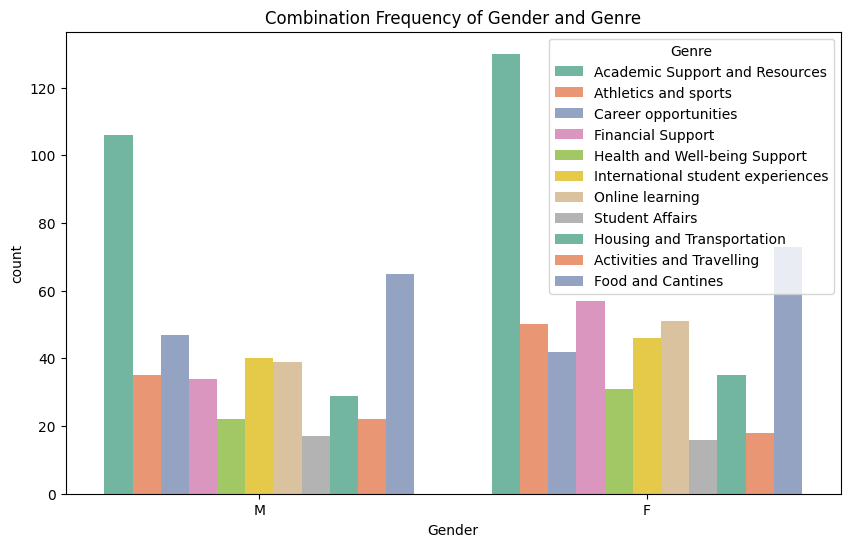

In [ ]:
# Relationships between categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='Genre', palette="Set2")
plt.title("Combination Frequency of Gender and Genre")
plt.show()

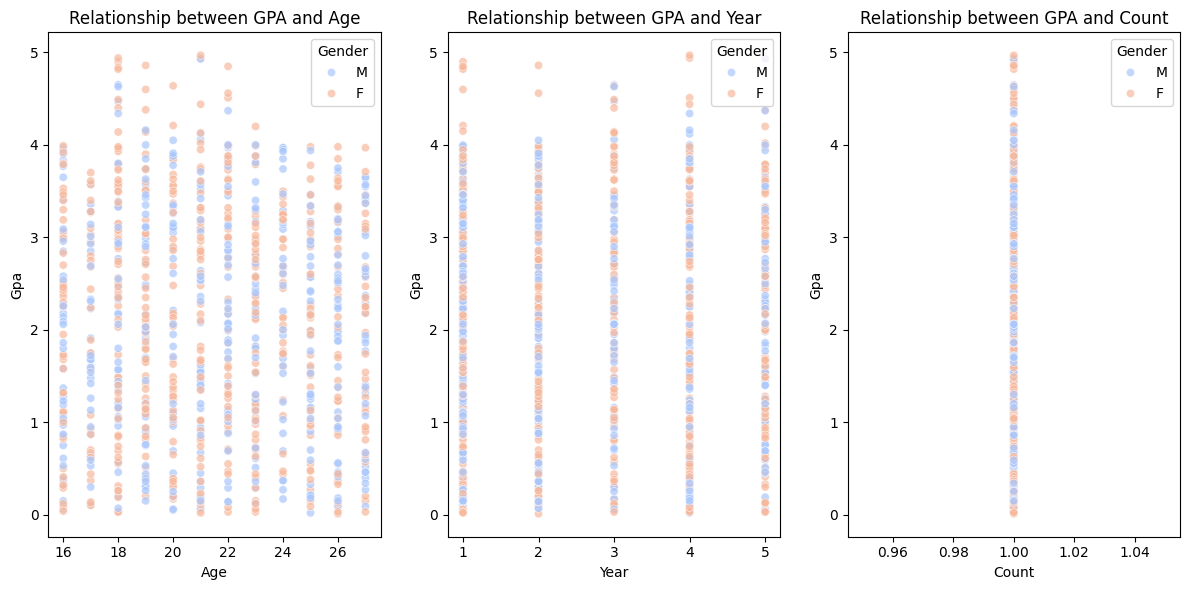

In [ ]:
# Relationship between GPA and other numerical variables
plt.figure(figsize=(12, 6))
for i, col in enumerate(['Age', 'Year', 'Count'], 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df, x=col, y='Gpa', hue='Gender', palette="coolwarm", alpha=0.7)
    plt.title(f"Relationship between GPA and {col}")
plt.tight_layout()
plt.show()

<ipython-input-15-ec806663ab5c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Gpa', data=df, palette="Blues")


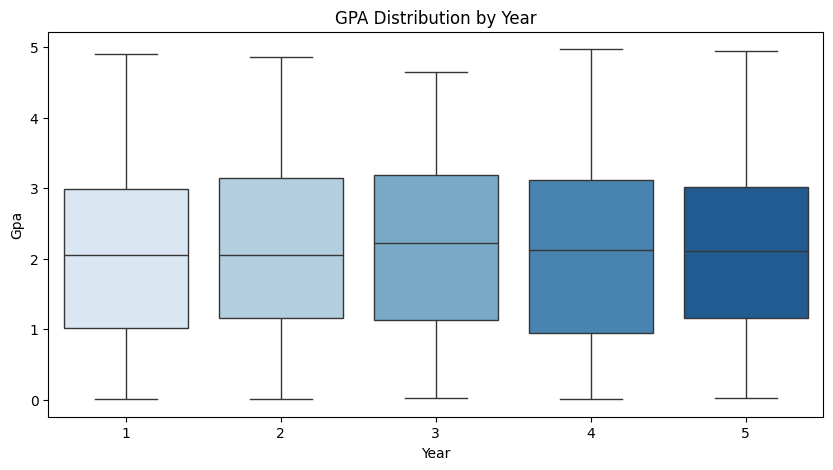

In [ ]:
# Trend of GPA over the years
plt.figure(figsize=(10, 5))
sns.boxplot(x='Year', y='Gpa', data=df, palette="Blues")
plt.title("GPA Distribution by Year")
plt.show()

#Sentiment Analysis


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Select the text column
text_col = 'Reports'

# Define a function for basic text cleaning
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

# Apply the cleaning function to the text column
df[text_col] = df[text_col].apply(lambda x: preprocess_text(str(x)))

# Preview the cleaned text
df[text_col].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Reports
0,limited access research databases materials ca...
1,im trouble finding course materials need class...
2,frustrating limited access research databases ...
3,im really struggling one classes cant get appo...
4,really struggling understanding instructions a...


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize VADER
vader = SentimentIntensityAnalyzer()

# Apply VADER to each comment and store the sentiment scores
df['vader_sentiment'] = df[text_col].apply(lambda x: vader.polarity_scores(x)['compound'])

# Preview the sentiment scores
df[['Reports', 'vader_sentiment']].head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Reports,vader_sentiment
0,limited access research databases materials ca...,0.2732
1,im trouble finding course materials need class...,-0.4019
2,frustrating limited access research databases ...,-0.6249
3,im really struggling one classes cant get appo...,0.7275
4,really struggling understanding instructions a...,-0.1263


In [ ]:
from textblob import TextBlob

# Apply TextBlob to calculate polarity (sentiment)
df['textblob_sentiment'] = df[text_col].apply(lambda x: TextBlob(x).sentiment.polarity)

# Preview TextBlob sentiment scores
df[['Reports', 'textblob_sentiment']].head()


,Reports,textblob_sentiment
0,limited access research databases materials ca...,0.309524
1,im trouble finding course materials need class...,-0.200000
2,frustrating limited access research databases ...,-0.235714
3,im really struggling one classes cant get appo...,0.166667
4,really struggling understanding instructions a...,0.066667


In [ ]:
!pip install transformers
!pip install torch


In [ ]:
from transformers import pipeline

# Load a sentiment-analysis pipeline using a transformer model
sentiment_model = pipeline("sentiment-analysis")

# Apply BERT-based sentiment analysis
df['bert_sentiment'] = df[text_col].apply(lambda x: sentiment_model(x)[0]['label'])

# Preview the results
df[['Reports', 'bert_sentiment']].head()


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


,Reports,bert_sentiment
0,limited access research databases materials ca...,NEGATIVE
1,im trouble finding course materials need class...,NEGATIVE
2,frustrating limited access research databases ...,NEGATIVE
3,im really struggling one classes cant get appo...,POSITIVE
4,really struggling understanding instructions a...,NEGATIVE


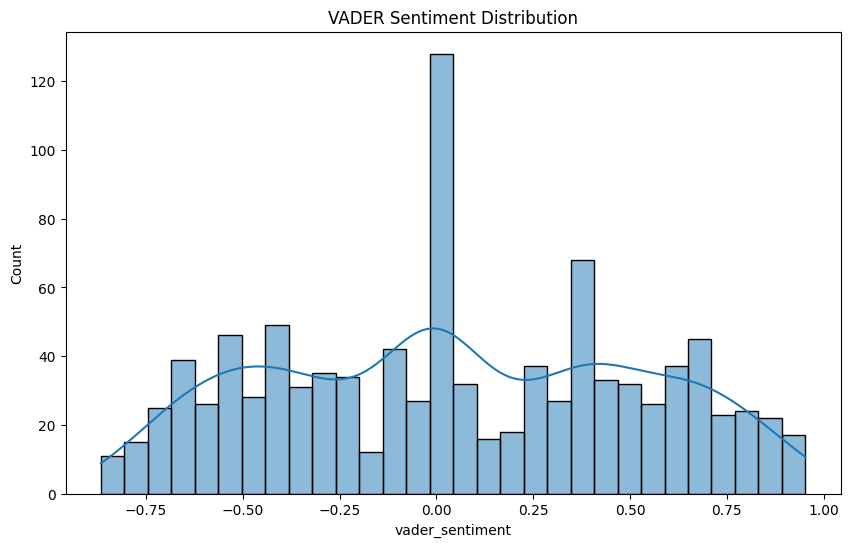

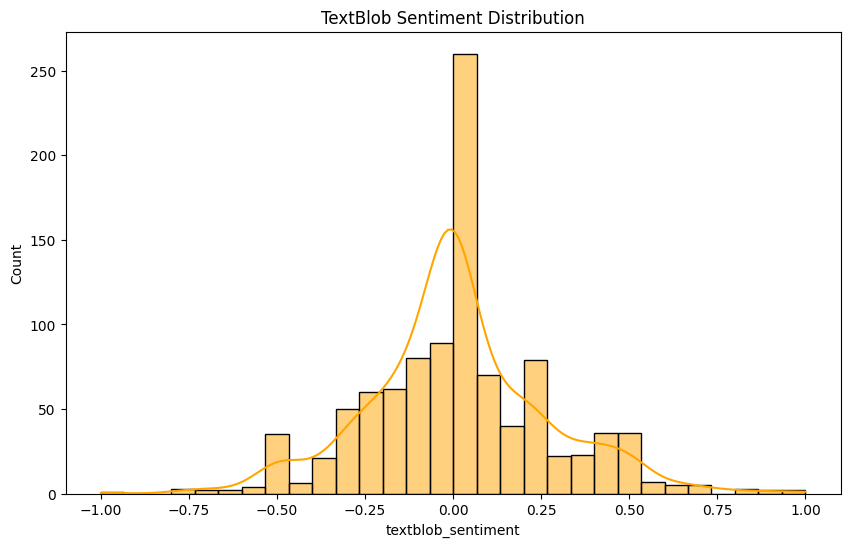

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of VADER Sentiment Scores
plt.figure(figsize=(10,6))
sns.histplot(df['vader_sentiment'], bins=30, kde=True)
plt.title("VADER Sentiment Distribution")
plt.show()

# Plotting TextBlob Sentiment Scores
plt.figure(figsize=(10,6))
sns.histplot(df['textblob_sentiment'], bins=30, kde=True, color='orange')
plt.title("TextBlob Sentiment Distribution")
plt.show()


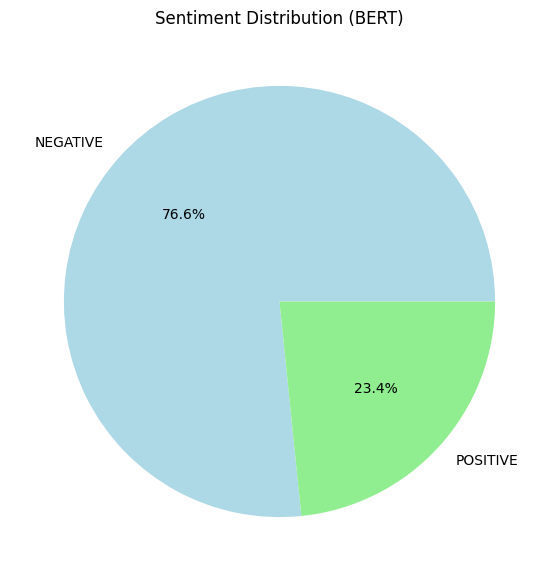

In [ ]:
# Count the sentiment classes from BERT model
bert_sentiment_counts = df['bert_sentiment'].value_counts()


plt.figure(figsize=(7, 7))
bert_sentiment_counts.plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'coral'])
plt.title("Sentiment Distribution (BERT)")
plt.ylabel('')
plt.show()


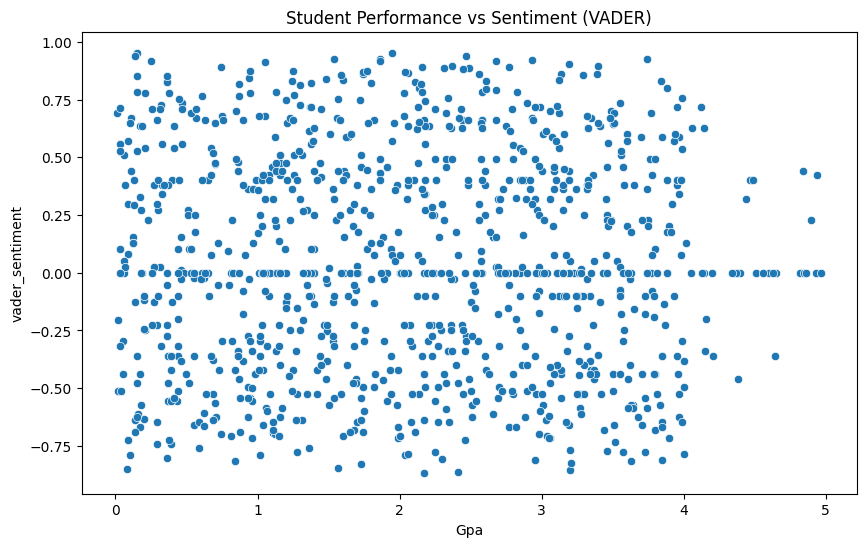

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Gpa', y='vader_sentiment')
plt.title('Student Performance vs Sentiment (VADER)')
plt.show()



In [ ]:
!pip install transformers
!pip install torch
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import pandas as pd
from datasets import Dataset
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split


text_col = 'Reports'
label_col = 'bert_sentiment'

# Map sentiment labels to numerical values (if they are categorical)
label_mapping = {'POSITIVE': 1, 'NEGATIVE': 0}
df[label_col] = df[label_col].map(label_mapping)

# Split data into train and test
train_texts, val_texts, train_labels, val_labels = train_test_split(df[text_col], df[label_col], test_size=0.2)

# Tokenize data
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=128)

# Convert data into Hugging Face dataset format
train_dataset = Dataset.from_dict({'input_ids': train_encodings['input_ids'], 'attention_mask': train_encodings['attention_mask'], 'labels': train_labels})
val_dataset = Dataset.from_dict({'input_ids': val_encodings['input_ids'], 'attention_mask': val_encodings['attention_mask'], 'labels': val_labels})

# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    logging_dir='./logs',
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

# Train and evaluate the model
trainer.train()


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss
1,No log,0.531350
2,No log,0.421589
3,No log,0.360539


TrainOutput(global_step=153, training_loss=0.4500113094554228, metrics={'train_runtime': 2436.1563, 'train_samples_per_second': 0.99, 'train_steps_per_second': 0.063, 'total_flos': 45861490282320.0, 'train_loss': 0.4500113094554228, 'epoch': 3.0})

In [ ]:
from transformers import TrainingArguments, Trainer


training_configs = [

    {"num_train_epochs": 3, "per_device_train_batch_size": 16, "warmup_steps": 500, "weight_decay": 0.01, "learning_rate": 2e-5},
    {"num_train_epochs": 5, "per_device_train_batch_size": 32, "warmup_steps": 1000, "weight_decay": 0.01, "learning_rate": 3e-5}
    {"num_train_epochs": 10, "per_device_train_batch_size": 8, "warmup_steps": 500, "weight_decay": 0.02, "learning_rate": 2e-5},
    {"num_train_epochs": 3, "per_device_train_batch_size": 16, "warmup_steps": 0, "weight_decay": 0.1, "learning_rate": 5e-5},
    {"num_train_epochs": 2, "per_device_train_batch_size": 64, "warmup_steps": 0, "weight_decay": 0.0, "learning_rate": 1e-5},
]

results = []

for config in training_configs:
    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=config["num_train_epochs"],
        per_device_train_batch_size=config["per_device_train_batch_size"],
        per_device_eval_batch_size=config["per_device_train_batch_size"],
        warmup_steps=500,
        weight_decay=config["weight_decay"],
        evaluation_strategy="epoch",
        logging_dir='./logs',
    )


    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
    )


    trainer.train()


    eval_results = trainer.evaluate()
    results.append({"config": config, "eval_results": eval_results})

for result in results:
    print("Config:", result["config"])
    print("Evaluation Results:", result["eval_results"])


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,0.309176
2,No log,0.352457
3,No log,0.441163


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,0.506260
2,No log,0.478096
3,No log,0.517239
4,No log,0.576496
5,No log,0.616558


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,0.812399
2,No log,0.902211
3,No log,0.592025
4,No log,0.747832
5,0.132300,0.910848
6,0.132300,0.759698
7,0.132300,0.967671
8,0.132300,1.085425
9,0.132300,1.135472
10,0.035800,1.172438


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,1.275578
2,No log,1.411226
3,No log,1.624940


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,1.604917
2,No log,1.588665


Config: {'num_train_epochs': 3, 'per_device_train_batch_size': 16, 'warmup_steps': 500, 'weight_decay': 0.01, 'learning_rate': 2e-05}
Evaluation Results: {'eval_loss': 0.441163033246994, 'eval_runtime': 24.9796, 'eval_samples_per_second': 8.047, 'eval_steps_per_second': 0.52, 'epoch': 3.0}
Config: {'num_train_epochs': 5, 'per_device_train_batch_size': 32, 'warmup_steps': 1000, 'weight_decay': 0.01, 'learning_rate': 3e-05}
Evaluation Results: {'eval_loss': 0.6165582537651062, 'eval_runtime': 25.3593, 'eval_samples_per_second': 7.926, 'eval_steps_per_second': 0.276, 'epoch': 5.0}
Config: {'num_train_epochs': 10, 'per_device_train_batch_size': 8, 'warmup_steps': 500, 'weight_decay': 0.02, 'learning_rate': 2e-05}
Evaluation Results: {'eval_loss': 1.1724377870559692, 'eval_runtime': 28.9413, 'eval_samples_per_second': 6.945, 'eval_steps_per_second': 0.898, 'epoch': 10.0}
Config: {'num_train_epochs': 3, 'per_device_train_batch_size': 16, 'warmup_steps': 0, 'weight_decay': 0.1, 'learning_rate

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from transformers import TrainingArguments, Trainer


training_configs = [

    {"num_train_epochs": 3, "per_device_train_batch_size": 16, "warmup_steps": 500, "weight_decay": 0.01, "learning_rate": 2e-5},
    {"num_train_epochs": 5, "per_device_train_batch_size": 32, "warmup_steps": 1000, "weight_decay": 0.01, "learning_rate": 3e-5},
    {"num_train_epochs": 10, "per_device_train_batch_size": 8, "warmup_steps": 500, "weight_decay": 0.02, "learning_rate": 2e-5},
    {"num_train_epochs": 3, "per_device_train_batch_size": 16, "warmup_steps": 0, "weight_decay": 0.1, "learning_rate": 5e-5},
    {"num_train_epochs": 2, "per_device_train_batch_size": 64, "warmup_steps": 0, "weight_decay": 0.0, "learning_rate": 1e-5},
]

results = []

for config in training_configs:

    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=config["num_train_epochs"],
        per_device_train_batch_size=config["per_device_train_batch_size"],
        per_device_eval_batch_size=config["per_device_train_batch_size"],
        warmup_steps=config["warmup_steps"],
        weight_decay=config["weight_decay"],
        evaluation_strategy="epoch",
        learning_rate=config["learning_rate"],
        logging_dir='./logs',
    )


    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
    )


    trainer.train()


    preds = trainer.predict(val_dataset)
    val_preds = np.argmax(preds.predictions, axis=1)


    accuracy = accuracy_score(val_labels, val_preds)
    f1 = f1_score(val_labels, val_preds)
    precision = precision_score(val_labels, val_preds)
    recall = recall_score(val_labels, val_preds)
    auc = roc_auc_score(val_labels, preds.predictions[:, 1])


    results.append({
        "config": config,
        "accuracy": accuracy,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "auc": auc
    })


for result in results:
    print("Config:", result["config"])
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"F1 Score: {result['f1']:.4f}")
    print(f"Precision: {result['precision']:.4f}")
    print(f"Recall: {result['recall']:.4f}")
    print(f"AUC: {result['auc']:.4f}")
    print("-" * 50)


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,0.412348
2,No log,0.471987
3,No log,0.559342


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,0.562739
2,No log,0.556800
3,No log,0.553868
4,No log,0.545046
5,No log,0.546912


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,0.657339
2,No log,0.744310
3,No log,0.874581
4,No log,0.857025
5,0.082500,0.955983
6,0.082500,0.829768
7,0.082500,0.945549
8,0.082500,1.057283
9,0.082500,1.040086
10,0.062300,1.077489


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,0.861317
2,No log,1.102986
3,No log,1.094880


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,1.127262
2,No log,1.061362


Config: {'num_train_epochs': 3, 'per_device_train_batch_size': 16, 'warmup_steps': 500, 'weight_decay': 0.01, 'learning_rate': 2e-05}
Accuracy: 0.8458
F1 Score: 0.6353
Precision: 0.7500
Recall: 0.5510
AUC: 0.8374
--------------------------------------------------
Config: {'num_train_epochs': 5, 'per_device_train_batch_size': 32, 'warmup_steps': 1000, 'weight_decay': 0.01, 'learning_rate': 3e-05}
Accuracy: 0.8507
F1 Score: 0.6512
Precision: 0.7568
Recall: 0.5714
AUC: 0.8516
--------------------------------------------------
Config: {'num_train_epochs': 10, 'per_device_train_batch_size': 8, 'warmup_steps': 500, 'weight_decay': 0.02, 'learning_rate': 2e-05}
Accuracy: 0.8557
F1 Score: 0.6742
Precision: 0.7500
Recall: 0.6122
AUC: 0.8370
--------------------------------------------------
Config: {'num_train_epochs': 3, 'per_device_train_batch_size': 16, 'warmup_steps': 0, 'weight_decay': 0.1, 'learning_rate': 5e-05}
Accuracy: 0.8657
F1 Score: 0.6747
Precision: 0.8235
Recall: 0.5714
AUC: 0.83


Testing Configuration: {'num_train_epochs': 3, 'per_device_train_batch_size': 16, 'warmup_steps': 500, 'weight_decay': 0.01, 'learning_rate': 2e-05}


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Confusion Matrix:
[[142  10]
 [ 17  32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       152
           1       0.76      0.65      0.70        49

    accuracy                           0.87       201
   macro avg       0.83      0.79      0.81       201
weighted avg       0.86      0.87      0.86       201


Accuracy: 0.8657
F1 Score: 0.8620


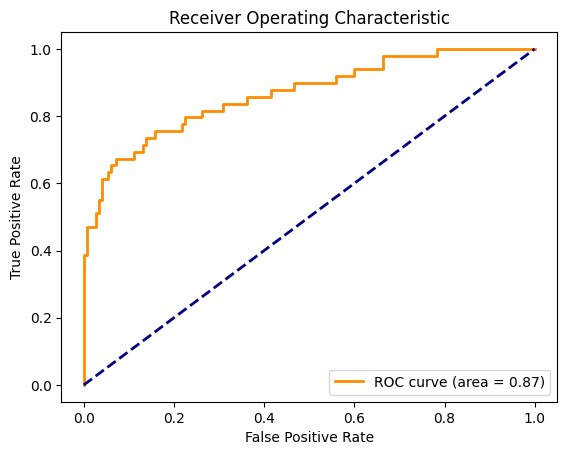

AUC: 0.8671

Testing Configuration: {'num_train_epochs': 5, 'per_device_train_batch_size': 32, 'warmup_steps': 1000, 'weight_decay': 0.01, 'learning_rate': 3e-05}


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Confusion Matrix:
[[142  10]
 [ 17  32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       152
           1       0.76      0.65      0.70        49

    accuracy                           0.87       201
   macro avg       0.83      0.79      0.81       201
weighted avg       0.86      0.87      0.86       201


Accuracy: 0.8657
F1 Score: 0.8620


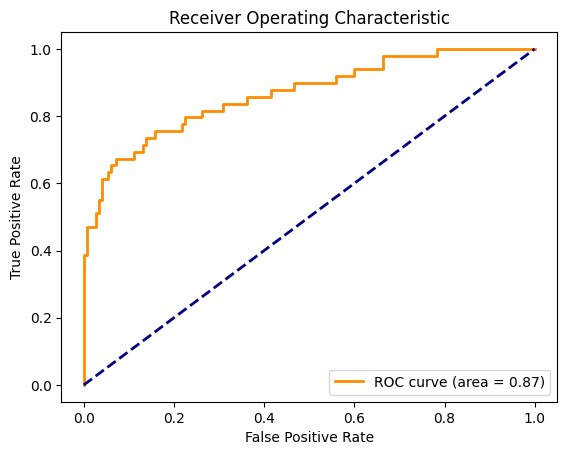

AUC: 0.8671

Testing Configuration: {'num_train_epochs': 10, 'per_device_train_batch_size': 8, 'warmup_steps': 500, 'weight_decay': 0.02, 'learning_rate': 2e-05}


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Confusion Matrix:
[[142  10]
 [ 17  32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       152
           1       0.76      0.65      0.70        49

    accuracy                           0.87       201
   macro avg       0.83      0.79      0.81       201
weighted avg       0.86      0.87      0.86       201


Accuracy: 0.8657
F1 Score: 0.8620


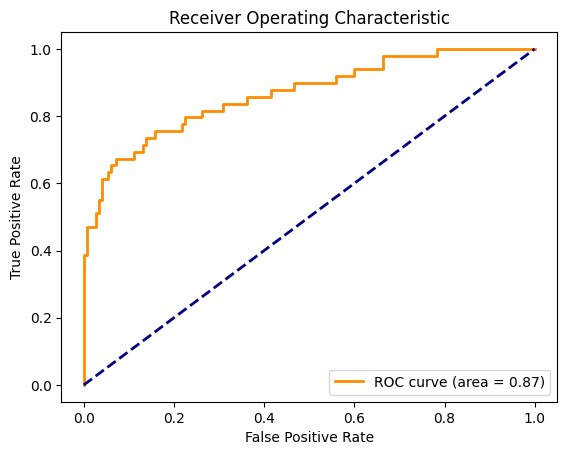

AUC: 0.8671

Testing Configuration: {'num_train_epochs': 3, 'per_device_train_batch_size': 16, 'warmup_steps': 0, 'weight_decay': 0.1, 'learning_rate': 5e-05}


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Confusion Matrix:
[[142  10]
 [ 17  32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       152
           1       0.76      0.65      0.70        49

    accuracy                           0.87       201
   macro avg       0.83      0.79      0.81       201
weighted avg       0.86      0.87      0.86       201


Accuracy: 0.8657
F1 Score: 0.8620


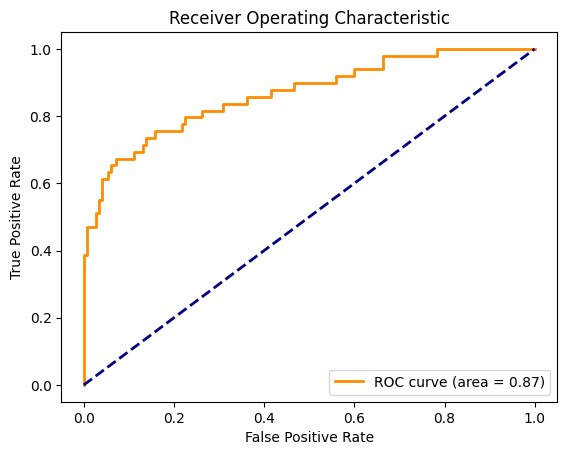

AUC: 0.8671

Testing Configuration: {'num_train_epochs': 2, 'per_device_train_batch_size': 64, 'warmup_steps': 0, 'weight_decay': 0.0, 'learning_rate': 1e-05}


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Confusion Matrix:
[[142  10]
 [ 17  32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91       152
           1       0.76      0.65      0.70        49

    accuracy                           0.87       201
   macro avg       0.83      0.79      0.81       201
weighted avg       0.86      0.87      0.86       201


Accuracy: 0.8657
F1 Score: 0.8620


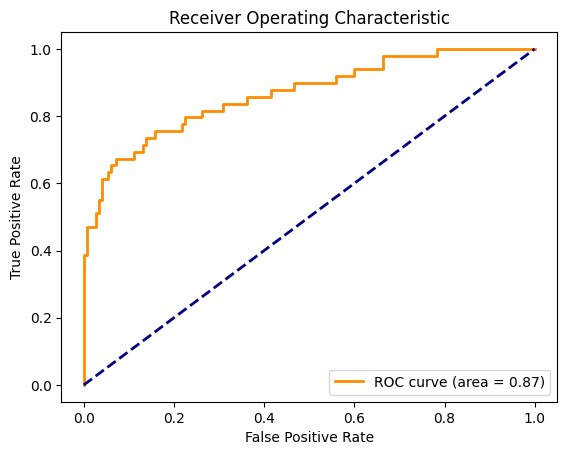

AUC: 0.8671


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np



def evaluate_model(trainer, val_dataset, val_labels):
    preds = trainer.predict(val_dataset)
    val_preds = np.argmax(preds.predictions, axis=1)


    cm = confusion_matrix(val_labels, val_preds)
    print("Confusion Matrix:")
    print(cm)


    print("\nClassification Report:")
    print(classification_report(val_labels, val_preds))


    accuracy = accuracy_score(val_labels, val_preds)
    f1 = f1_score(val_labels, val_preds, average='weighted')
    print(f"\nAccuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")


    fpr, tpr, _ = roc_curve(val_labels, preds.predictions[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    print(f"AUC: {roc_auc:.4f}")

for config in training_configs:
    print("\nTesting Configuration:", config)
    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=config["num_train_epochs"],
        per_device_train_batch_size=config["per_device_train_batch_size"],
        per_device_eval_batch_size=config["per_device_train_batch_size"],
        warmup_steps=config["warmup_steps"],
        weight_decay=config["weight_decay"],
        evaluation_strategy="epoch",
        logging_dir='./logs',
        learning_rate=config["learning_rate"],
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
    )

    evaluate_model(trainer, val_dataset, val_labels)



Testing Configuration: {'num_train_epochs': 3, 'per_device_train_batch_size': 16, 'warmup_steps': 500, 'weight_decay': 0.01, 'learning_rate': 2e-05}


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Confusion Matrix:
[[145   7]
 [ 20  29]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       152
           1       0.81      0.59      0.68        49

    accuracy                           0.87       201
   macro avg       0.84      0.77      0.80       201
weighted avg       0.86      0.87      0.86       201


Accuracy: 0.8657
F1 Score: 0.8582


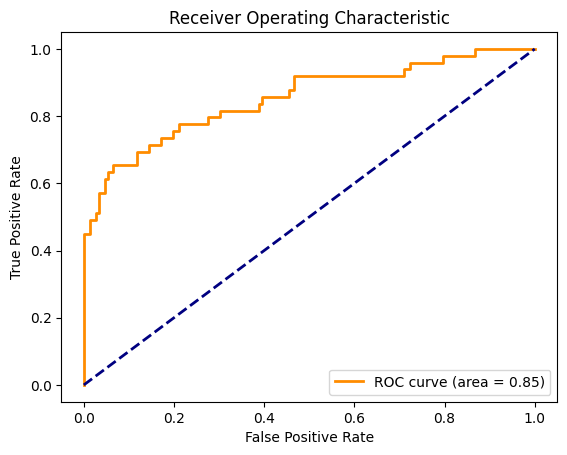

AUC: 0.8537



Error Analysis (Misclassified Samples):


KeyError: 4

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, f1_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import numpy as np
from transformers import Trainer, TrainingArguments



# 評価関数の定義
def evaluate_model(trainer, val_dataset, val_labels):
    preds = trainer.predict(val_dataset)
    val_preds = np.argmax(preds.predictions, axis=1)

    # 混同行列
    cm = confusion_matrix(val_labels, val_preds)
    print("Confusion Matrix:")
    print(cm)

    # 分類レポート
    print("\nClassification Report:")
    print(classification_report(val_labels, val_preds))

    # AccuracyとF1スコア
    accuracy = accuracy_score(val_labels, val_preds)
    f1 = f1_score(val_labels, val_preds, average='weighted')
    print(f"\nAccuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # ROC曲線とAUC
    fpr, tpr, _ = roc_curve(val_labels, preds.predictions[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    print(f"AUC: {roc_auc:.4f}")

# エラー分析
def error_analysis(val_labels, val_preds, val_dataset):
    errors = np.where(val_preds != val_labels)[0]  # 誤分類のインデックスを取得
    print("\nError Analysis (Misclassified Samples):")
    for i in errors[:10]:  # 最初の10件を表示
        print(f"True label: {val_labels[i]}, Predicted: {val_preds[i]}, Sample: {val_dataset[i]}")

# 交差検証を用いた評価
def cross_validate_model(model, dataset, labels, n_splits=5):
    from sklearn.model_selection import StratifiedKFold
    skf = StratifiedKFold(n_splits=n_splits)
    accuracies = []
    f1_scores = []

    for train_index, test_index in skf.split(dataset, labels):
        train_data = dataset.select(train_index)
        test_data = dataset.select(test_index)
        val_labels = labels[test_index]

        training_args = TrainingArguments(
            output_dir='./results',
            num_train_epochs=3,
            per_device_train_batch_size=16,
            per_device_eval_batch_size=16,
            warmup_steps=500,
            weight_decay=0.01,
            evaluation_strategy="no",
            logging_dir='./logs',
            learning_rate=2e-5,
        )

        trainer = Trainer(
            model=model,
            args=training_args,
            train_dataset=train_data,
            eval_dataset=test_data,
        )

        preds = trainer.predict(test_data)
        val_preds = np.argmax(preds.predictions, axis=1)

        accuracy = accuracy_score(val_labels, val_preds)
        f1 = f1_score(val_labels, val_preds, average='weighted')
        accuracies.append(accuracy)
        f1_scores.append(f1)

    print(f"\nCross-Validation Results:\nAverage Accuracy: {np.mean(accuracies):.4f}, Average F1 Score: {np.mean(f1_scores):.4f}")

# トレーニング設定をリストで定義
training_configs = [
    {"num_train_epochs": 3, "per_device_train_batch_size": 16, "warmup_steps": 500, "weight_decay": 0.01, "learning_rate": 2e-5},
    {"num_train_epochs": 5, "per_device_train_batch_size": 32, "warmup_steps": 1000, "weight_decay": 0.01, "learning_rate": 3e-5},
    {"num_train_epochs": 10, "per_device_train_batch_size": 8, "warmup_steps": 500, "weight_decay": 0.02, "learning_rate": 2e-5},
    {"num_train_epochs": 3, "per_device_train_batch_size": 16, "warmup_steps": 0, "weight_decay": 0.1, "learning_rate": 5e-5},
    {"num_train_epochs": 2, "per_device_train_batch_size": 64, "warmup_steps": 0, "weight_decay": 0.0, "learning_rate": 1e-5},
]

# 各設定で評価するメイン処理
for config in training_configs:
    print("\nTesting Configuration:", config)

    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=config["num_train_epochs"],
        per_device_train_batch_size=config["per_device_train_batch_size"],
        per_device_eval_batch_size=config["per_device_train_batch_size"],
        warmup_steps=config["warmup_steps"],
        weight_decay=config["weight_decay"],
        evaluation_strategy="no",  # 評価を行わない設定
        logging_dir='./logs',
        learning_rate=config["learning_rate"],
    )

    trainer = Trainer(
        model=model,  # 既にトレーニングされたモデルを使用
        args=training_args,
        train_dataset=train_dataset,  # 学習データは使用しない
        eval_dataset=val_dataset,      # 検証データを使用
    )

    evaluate_model(trainer, val_dataset, val_labels)  # モデルの評価
    error_analysis(val_labels, np.argmax(trainer.predict(val_dataset).predictions, axis=1), val_dataset)  # エラー分析

    # 交差検証を行う
    cross_validate_model(model, train_dataset, train_labels, n_splits=5)


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Predict on validation set
preds = trainer.predict(val_dataset)
val_preds = np.argmax(preds.predictions, axis=1)

# Evaluate model performance
accuracy = accuracy_score(val_labels, val_preds)
f1 = f1_score(val_labels, val_preds)

print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation F1 Score: {f1:.4f}")


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [ ]:
!pip install gensim
!pip install pyLDAvis
!pip install nltk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.0 MB/s eta 0:00:00


In [ ]:
import gensim
from gensim import corpora
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Preprocessing for LDA
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Tokenize and clean the text for LDA
df['tokens'] = df[text_col].apply(lambda x: word_tokenize(x.lower()))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.isalnum()])

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(df['tokens'])

# Create a document-term matrix
corpus = [dictionary.doc2bow(doc) for doc in df['tokens']]

# Build the LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Visualize the topics
lda_display = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


(0, '0.031*"opportunities" + 0.030*"job" + 0.018*"students" + 0.017*"university" + 0.014*"available"')
(1, '0.023*"students" + 0.022*"options" + 0.016*"university" + 0.013*"campus" + 0.012*"offer"')
(2, '0.023*"campus" + 0.022*"students" + 0.018*"wish" + 0.016*"options" + 0.015*"feel"')
(3, '0.035*"limited" + 0.034*"access" + 0.031*"im" + 0.025*"academic" + 0.019*"course"')
(4, '0.024*"im" + 0.018*"time" + 0.017*"university" + 0.016*"students" + 0.014*"academic"')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


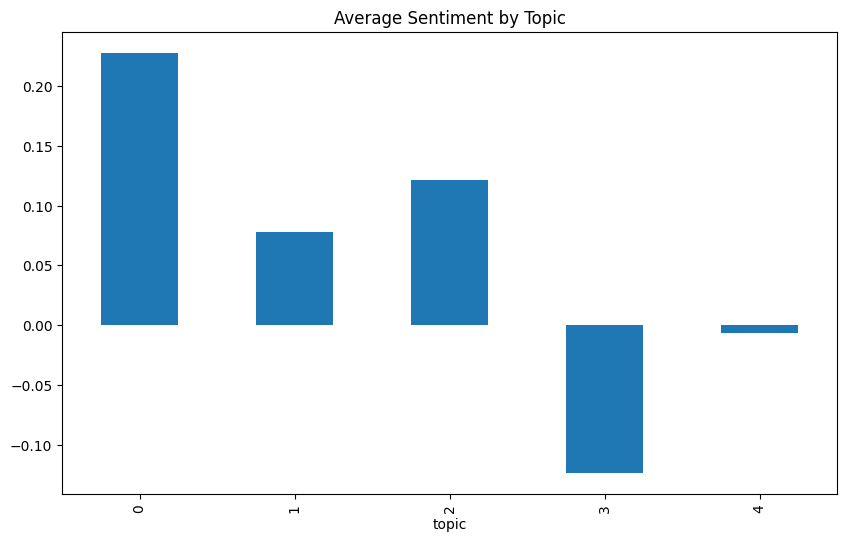

In [ ]:
# Add topic to each feedback based on the dominant topic for that text
df['topic'] = [sorted(lda_model.get_document_topics(bow), key=lambda x: x[1], reverse=True)[0][0] for bow in corpus]

# Calculate average sentiment for each topic
topic_sentiment = df.groupby('topic')['vader_sentiment'].mean()

# Plot sentiment for each topic
topic_sentiment.plot(kind='bar', title="Average Sentiment by Topic", figsize=(10, 6))
plt.show()


In [ ]:
!pip install gensim
!pip install pyLDAvis
!pip install nltk


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import gensim
from gensim import corpora
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import nltk
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('punkt')

# Ensure text preprocessing is done (removing stopwords, punctuations etc.)
# Assuming `text_col` is your feedback column

# Tokenize the cleaned text data
df['tokens'] = df[text_col].apply(lambda x: word_tokenize(x.lower()))

# Remove non-alphanumeric tokens (keeping only words)
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.isalnum()])

# Create a dictionary representation of the documents (corpus)
dictionary = corpora.Dictionary(df['tokens'])

# Create a document-term matrix
corpus = [dictionary.doc2bow(doc) for doc in df['tokens']]

# Build the LDA model to discover 5 topics (you can adjust `num_topics`)
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics with the top words for each topic
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Visualize the topics using pyLDAvis
lda_display = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_display)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(0, '0.037*"academic" + 0.020*"opportunities" + 0.017*"university" + 0.017*"students" + 0.015*"resources"')
(1, '0.025*"university" + 0.025*"campus" + 0.024*"options" + 0.020*"students" + 0.018*"food"')
(2, '0.027*"im" + 0.018*"health" + 0.014*"student" + 0.014*"mental" + 0.012*"options"')
(3, '0.033*"limited" + 0.032*"im" + 0.029*"access" + 0.026*"course" + 0.020*"like"')
(4, '0.025*"students" + 0.018*"online" + 0.014*"university" + 0.012*"difficult" + 0.011*"hard"')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


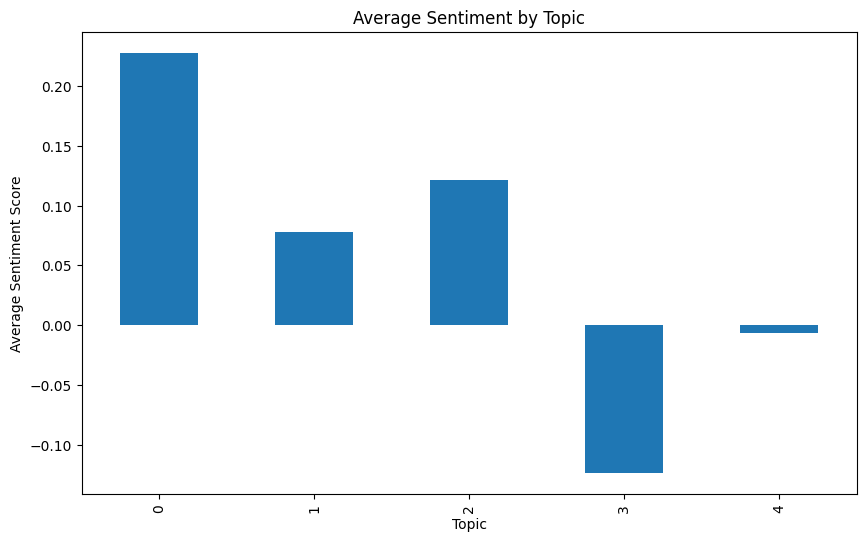

In [ ]:
import matplotlib.pyplot as plt

# Assuming `topic_sentiment` contains the average sentiment score for each topic
# The column name was 'topic', not 'dominant_topic'
topic_sentiment = df.groupby('topic')['vader_sentiment'].mean()

# Plot sentiment for each topic
topic_sentiment.plot(kind='bar', title="Average Sentiment by Topic", figsize=(10, 6))
plt.xlabel('Topic')
plt.ylabel('Average Sentiment Score')
plt.show()